In [1]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_folder = r"C:\Users\pipi3\Desktop\Course\year3_sem3 (Japan)\FYP\input_data\vgchartz";

In [3]:
#raw data
df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname='2017')
df.head()

,Rank,Game,Platform,Publisher,Genre,Week,Yearly,Total
0.0,1.0,Horizon: Zero Dawn,PS4,Sony Computer Entertainment,Action,12.0,2875704,2875704.0
1.0,2.0,The Legend of Zelda: Breath of the Wild,NS,Nintendo,Action,12.0,2837078,2837078.0
2.0,3.0,Resident Evil VII: Biohazard,PS4,Capcom,Action,17.0,2028360,2028360.0
3.0,4.0,Tom Clancy's Ghost Recon Wildlands,PS4,Ubisoft,Shooter,11.0,1928638,1928638.0
4.0,5.0,Mario Kart 8 Deluxe,NS,Nintendo,Racing,4.0,1834920,1834920.0


In [4]:
#create pivot table (Platform vs Total Sales)
for i in range(13):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname=sname)
    locals()["pt"+str(i+5)] = df.pivot_table(values='Yearly', index=['Platform'], aggfunc='sum')

#combine each worksheet result
df = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16, pt17], axis=1)
pd.options.display.float_format = '{:,.0f}'.format
df.columns = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
#dfps = df.fillna(0) #Platform, Sales
dfps2 = df.transpose()
dfps2.reset_index(level=0, inplace=True)
dfps2 = dfps2.rename(columns = {'index':'Year'})
dfps2

,Year,3DS,DS,NS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2005,nan,"22,769,852",nan,"568,968",nan,nan,"17,753,295",nan,nan,nan,"2,274,254",nan
1,2006,nan,"60,051,250",nan,"374,837","426,417",nan,"13,669,248",nan,"5,984,058",nan,"16,931,193",nan
2,2007,nan,"63,479,020",nan,"1,457,750","17,261,715",nan,"11,291,102",nan,"51,817,129",nan,"35,199,663",nan
3,2008,nan,"69,896,460",nan,nan,"33,566,602",nan,"11,238,327",nan,"100,205,573",nan,"52,583,022",nan
4,2009,nan,"52,038,119",nan,"1,223,662","39,530,023",nan,"3,763,610",nan,"90,075,853",nan,"53,754,249",nan
5,2010,nan,"37,642,930",nan,"5,858,869","62,844,153",nan,"8,875,561",nan,"87,975,216",nan,"66,921,651",nan
6,2011,"13,844,566","15,751,080",nan,"7,134,078","65,066,749",nan,nan,nan,"56,815,721",nan,"80,532,822",nan
7,2012,"19,492,044","8,834,672",nan,"8,221,018","56,103,455",nan,nan,nan,"27,881,707","2,714,853","67,163,232",nan
8,2013,"36,441,626","1,242,092",nan,"3,402,386","70,733,409","6,529,590",nan,nan,"10,937,338","8,119,304","59,673,696","3,271,082"
9,2014,"34,667,549",nan,nan,"2,746,829","29,393,012","56,391,176",nan,nan,"2,362,326","13,635,635","21,700,040","25,726,012"


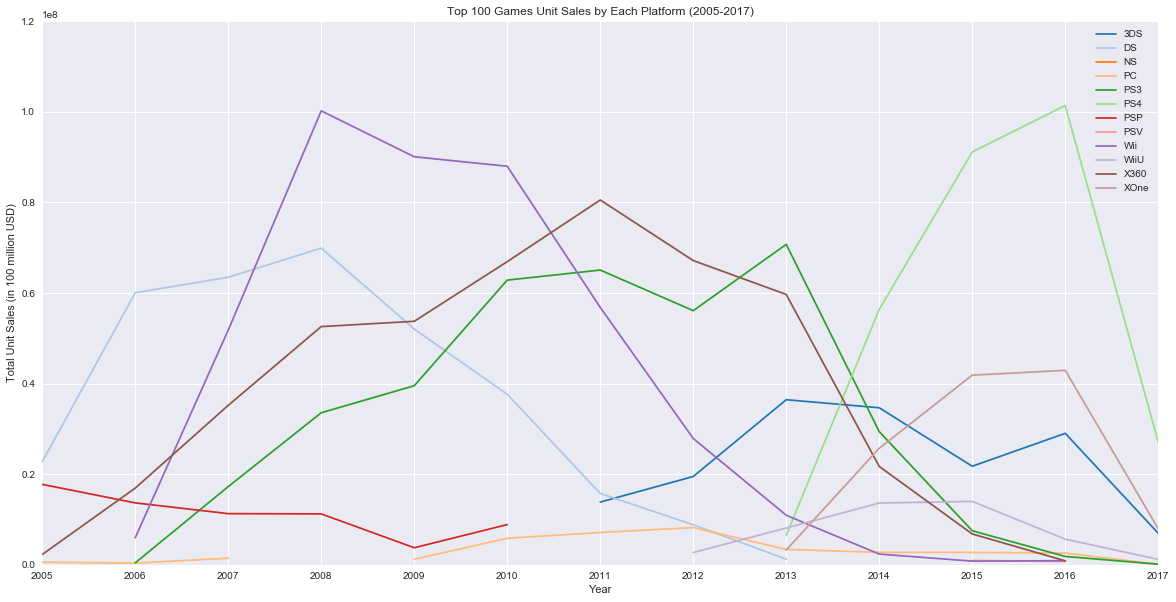

In [5]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))
ax = dfps2.plot(table=False, figsize=(20,10), color=colors)

ax.set_xlabel("Year")
ax.set_ylabel("Total Unit Sales (in 100 million USD)")
ax.set_xticks(np.arange(len(dfps2['Year'])))
ax.set_xticklabels(dfps2['Year'])
ax.set_ylim([0,120000000])
ax.set_title('Top 100 Games Unit Sales by Each Platform (2005-2017)')
plt.legend(loc='best')

#add a table in below
#ax.get_xaxis().set_visible(False)

In [6]:
#create pivot chart(Top 100 Games vs Genre vs Platform in 2017)
df = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname='2017')
df = df.pivot_table(values='Yearly', index=['Genre'], columns=['Platform'],aggfunc='sum')
df = df.transpose().fillna(0)
df

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,"1,698,056",0,0,"147,348","1,028,297",0,"362,902","3,286,123",0,"214,255","223,779",0
NS,"2,837,078",0,0,"563,674",0,"315,762","1,834,920",0,0,0,0,0
PC,0,0,0,0,0,0,0,0,0,"139,364",0,0
PS3,0,0,0,0,0,0,0,0,0,0,"137,258",0
PS4,"10,897,447","150,777","405,981","810,697",0,0,0,"5,209,667","6,325,344",0,"3,266,827",0
WiiU,"1,014,450",0,0,"186,357",0,0,0,0,0,0,0,0
XOne,"2,045,274",0,"179,123","509,134",0,0,"408,411","722,207","2,657,933",0,"1,143,267","279,863"


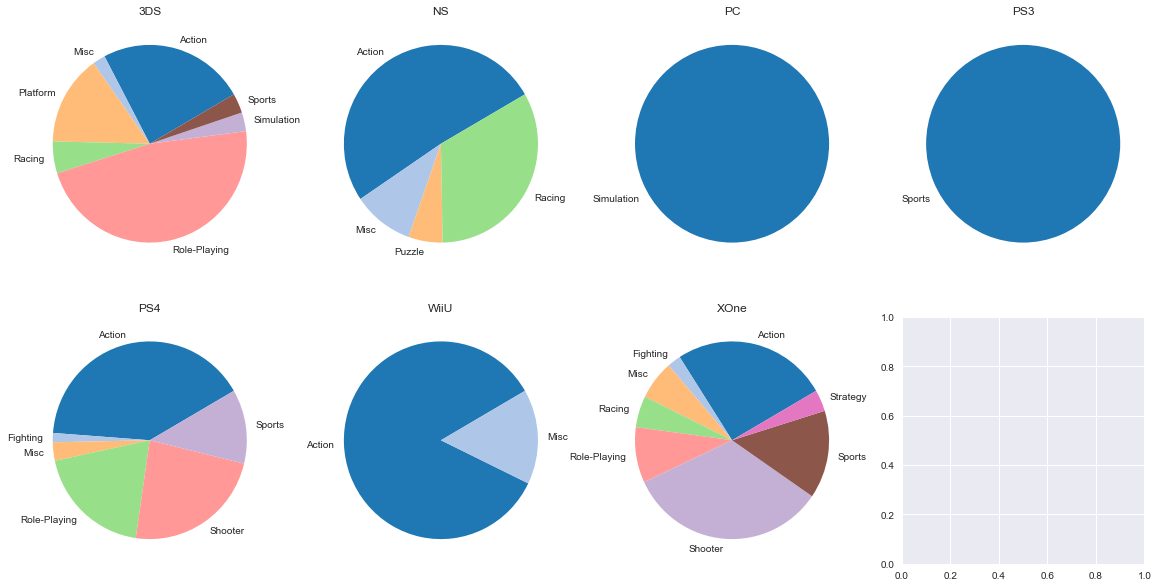

In [7]:
colors = plt.cm.tab20(np.linspace(0, 1, 12))
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, (idx, row) in enumerate(df.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, colors=colors)
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

In [8]:
#create pivot chart(Top 100 Games vs Genre vs Platform (2005-2017))
for i in range(13):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    dfgp = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname=sname)
    locals()["pt"+str(i+5)] = dfgp.pivot_table(values='Yearly', index=['Genre'], columns=['Platform'],aggfunc='sum').transpose().fillna(0)

#combine each worksheet result
dfgp = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16, pt17])
dfgp = dfgp.groupby(dfgp.index).sum()
dfgp


,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,"28,362,074","3,447,347","7,125,974","2,474,763","25,732,875","1,158,389","13,656,512","65,596,467",0,"13,553,933","1,072,307",0
DS,"6,598,895","23,083,908","1,496,744","72,155,879","46,173,658","8,084,262","24,459,241","87,182,028","943,154","51,221,784","8,726,805","1,579,117"
NS,"2,837,078",0,0,"563,674",0,"315,762","1,834,920",0,0,0,0,0
PC,"2,491,980",0,0,0,0,0,0,"16,131,639","5,093,161","8,245,627","682,589","3,790,990"
PS3,"126,705,019","18,693,688","11,015,288","3,525,025","7,317,132",0,"28,171,605","21,077,176","106,210,278",0,"61,708,064",0
PS4,"89,137,696","7,244,601","5,779,289","4,184,260","2,965,012",0,"5,122,992","29,388,405","87,343,042","673,262","50,663,184",0
PSP,"15,195,789","755,980","2,170,360","805,416","7,289,380","1,274,945","9,034,285","16,616,585","4,011,581","410,945","7,824,756","1,201,121"
PSV,0,0,0,"1,697,939",0,nan,0,0,0,0,0,nan
Wii,"13,429,945","6,431,921","10,156,502","108,043,494","58,276,475","1,711,590","34,420,886","1,738,912","5,919,161","5,371,734","190,264,178",0


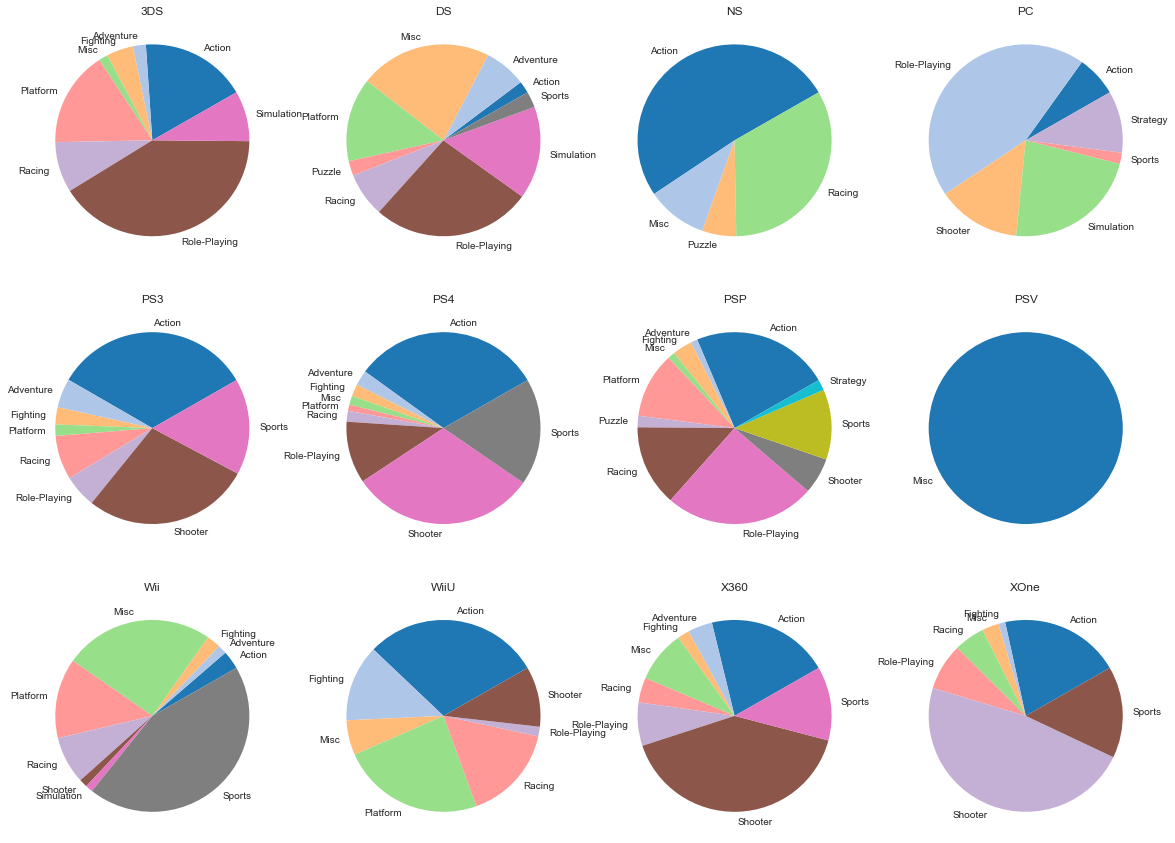

In [9]:
colors = plt.cm.tab20(np.linspace(0, 1, 12))
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
for i, (idx, row) in enumerate(dfgp.iterrows()):
    ax = axes[i // 4, i % 4]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, colors=colors)
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)

In [10]:
#create pivot chart(Genre vs Each Platform (2005-2017))
platform = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
genre = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
year = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
for i in range(12):
    if((i+5) < 10):
        sname = '200'+str(i+5)
    else:
        sname = '20'+str(i+5)        
    dfgpy = pd.read_excel(data_folder+"\\Global Yearly Chart.xlsx", sheetname=sname)
    locals()["pt"+str(i+5)] = dfgpy.pivot_table(values=['Yearly'], index=['Platform', 'Genre'],aggfunc='sum').transpose()



dfgpy = pd.concat([pt5, pt6, pt7, pt8, pt9, pt10, pt11, pt12, pt13, pt14, pt15, pt16]).transpose()
dfgpy.columns = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
dfgpy = dfgpy.fillna(0)
dfgpy = dfgpy.transpose()
dfgpy

Platform       3DS                                                    \
Genre       Action Adventure  Fighting      Misc  Platform    Puzzle   
2005             0         0         0         0         0         0   
2006             0         0         0         0         0         0   
2007             0         0         0         0         0         0   
2008             0         0         0         0         0         0   
2009             0         0         0         0         0         0   
2010             0         0         0         0         0         0   
2011     2,361,053         0         0         0 4,606,466         0   
2012       970,044         0         0         0 8,270,489         0   
2013     8,209,591 3,447,347         0 1,627,808 4,803,182 1,158,389   
2014     3,309,571         0 5,546,831         0 3,445,910         0   
2015     7,786,000         0 1,579,143         0   971,508         0   
2016     4,027,759         0         0   699,607 2,607,023         0   

Platform                                              ...          X360  \
Genre       Racing Role-Playing Simulation  Sports    ...        Sports   
2005             0            0          0       0    ...       338,728   
2006             0            0          0       0    ...     3,578,235   
2007             0            0          0       0    ...     2,677,385   
2008             0            0          0       0    ...     5,161,988   
2009             0            0          0       0    ...     5,105,008   
2010             0            0          0       0    ...     8,345,258   
2011     3,925,017      986,674  1,965,356       0    ...    10,785,360   
2012     3,379,678    3,092,112  2,931,193 848,528    ...     5,849,115   
2013     1,895,073   15,300,236          0       0    ...     7,987,235   
2014     1,357,381   18,799,296  2,208,560       0    ...     5,293,398   
2015     1,211,711    5,479,608  4,725,379       0    ...     2,072,022   
2016     1,524,750   18,652,418  1,509,190       0    ...             0   

Platform                 XOne                                          \
Genre     Strategy     Action Adventure  Fighting      Misc    Racing   
2005             0          0         0         0         0         0   
2006             0          0         0         0         0         0   
2007             0          0         0         0         0         0   
2008             0          0         0         0         0         0   
2009     1,628,033          0         0         0         0         0   
2010             0          0         0         0         0         0   
2011             0          0         0         0         0         0   
2012             0          0         0         0         0         0   
2013             0          0         0         0         0   907,797   
2014             0 10,594,275         0         0         0   951,575   
2015             0  6,287,956   968,151 1,201,488 1,088,684 1,238,487   
2016             0  5,251,492         0         0 1,777,471 2,665,295   

Platform                                    
Genre    Role-Playing    Shooter    Sports  
2005                0          0         0  
2006                0          0         0  
2007                0          0         0  
2008                0          0         0  
2009                0          0         0  
2010                0          0         0  
2011                0          0         0  
2012                0          0         0  
2013                0  2,363,285         0  
2014                0 10,300,349 3,879,813  
2015        5,624,750 18,995,186 6,461,312  
2016        3,107,136 23,038,416 7,085,145  

[12 rows x 97 columns]

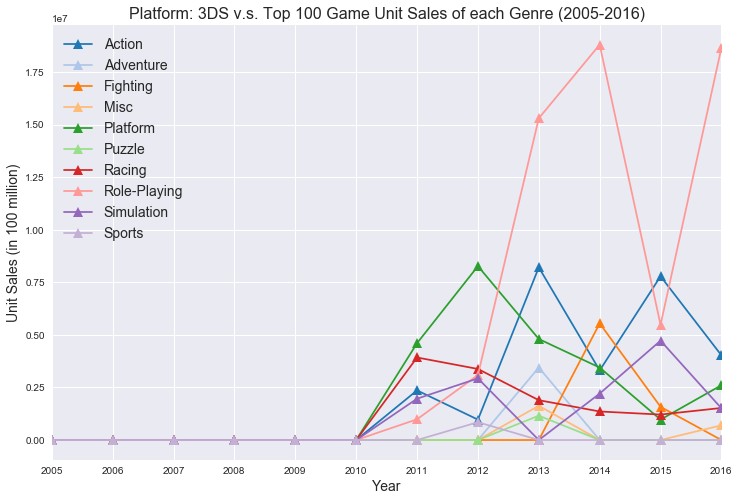

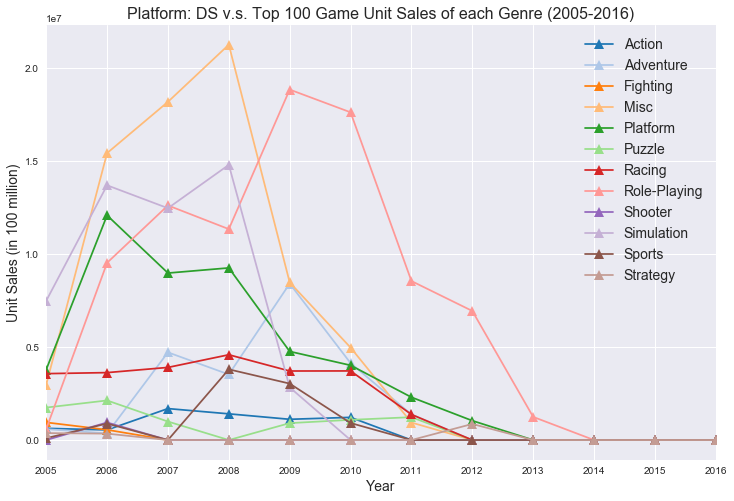

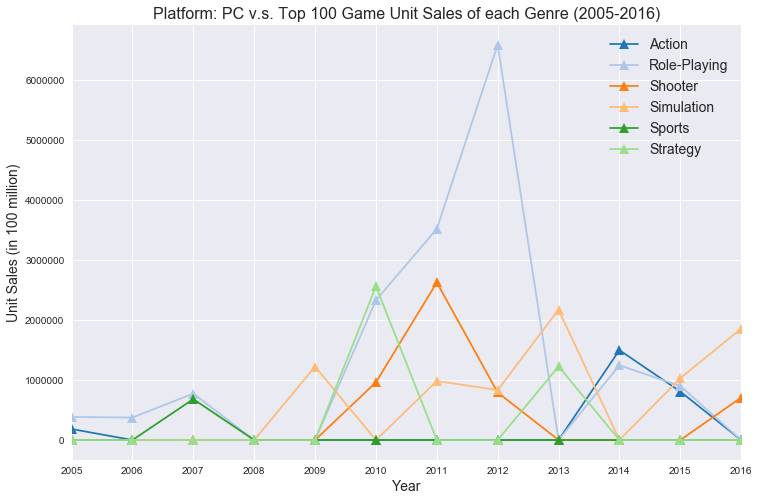

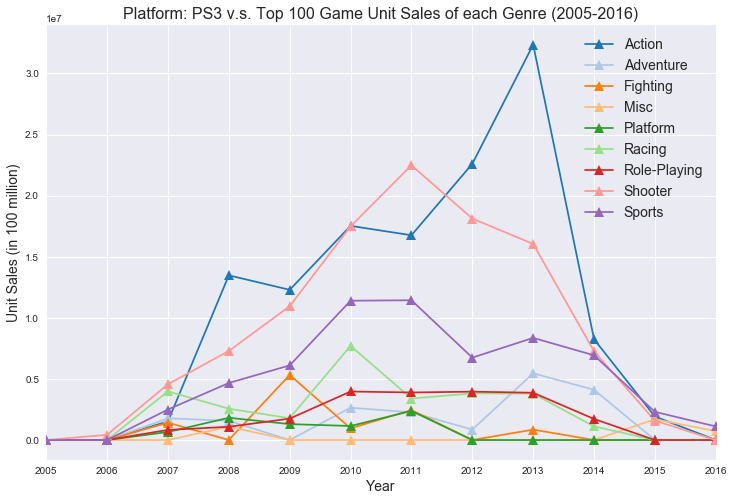

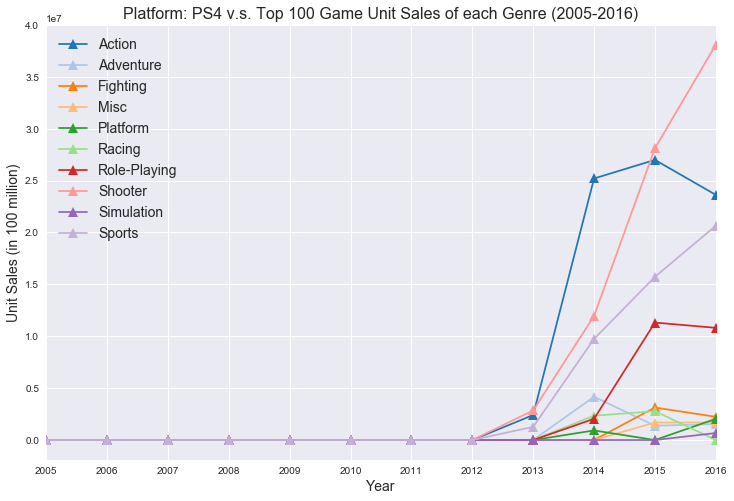

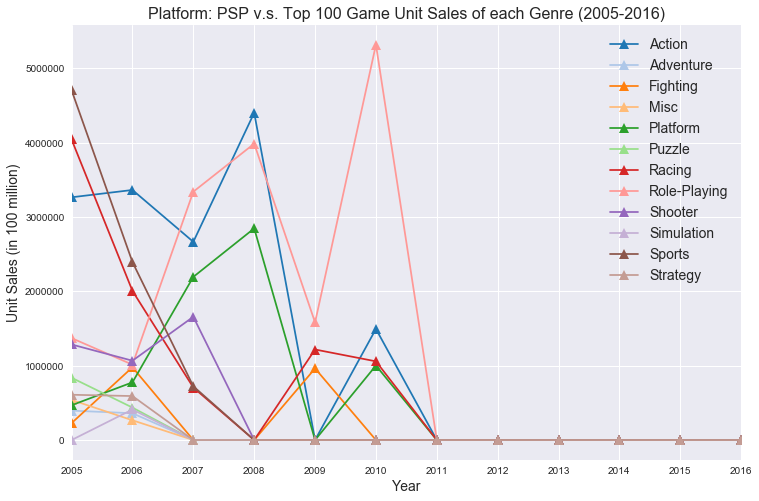

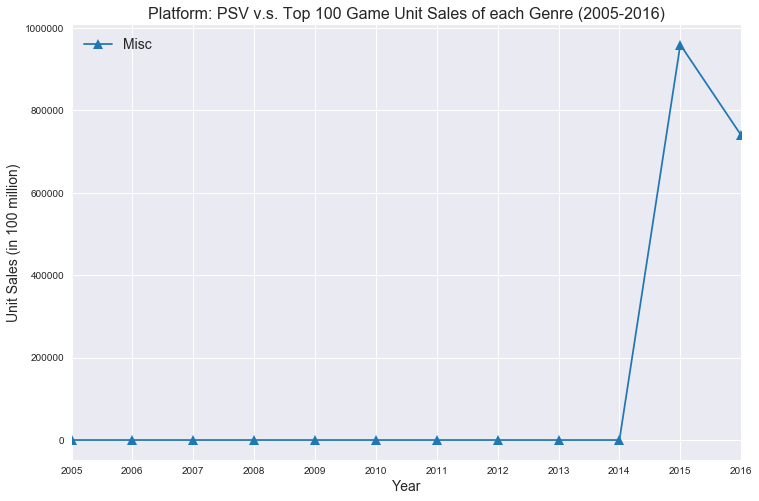

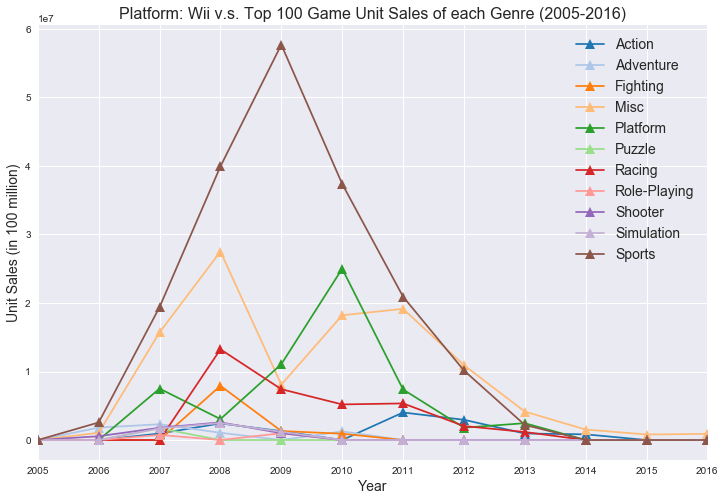

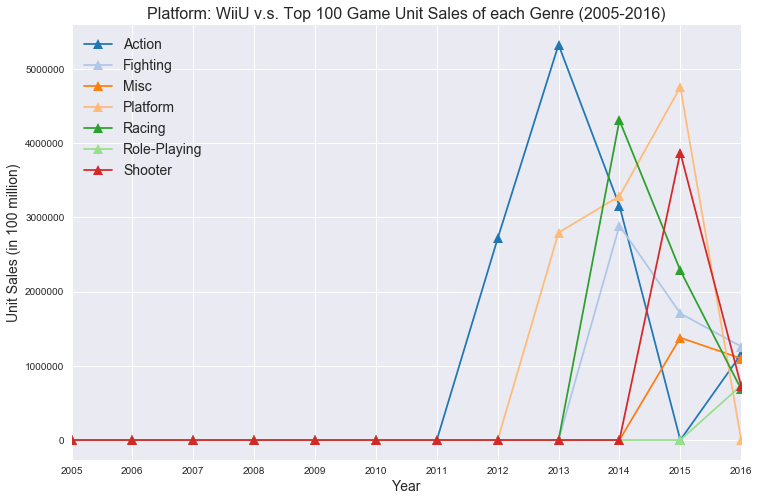

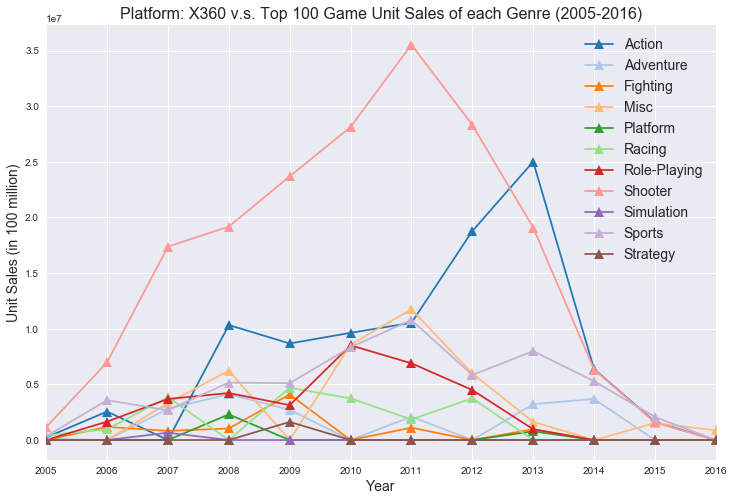

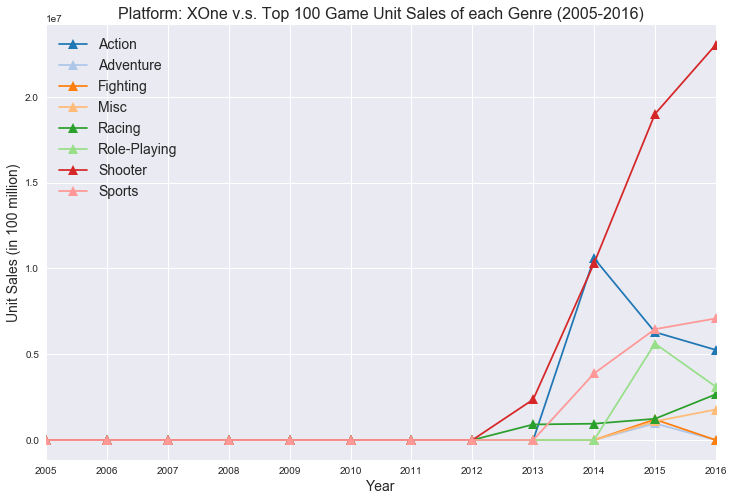

In [12]:
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors2 = plt.cm.Pastel1(np.linspace(0, 1, 20))

for i in range(len(platform)): 
    ax = dfgpy[platform[i]].plot(figsize=(12, 8), color=colors, zorder=2, marker='^', markersize=10)
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel("Unit Sales (in 100 million)", fontsize=14)
    ax.set_xticks(np.arange(len(year)))
    ax.set_xticklabels(year)
    ax.set_title('Platform: '+platform[i]+' v.s. Top 100 Game Unit Sales of each Genre (2005-2016)', fontsize=16)
    plt.legend(loc='best', fontsize=14)
